# STAT 207 Project 03 - An In-depth Analysis of Nutritional Facts of Starbucks Beverages

- Kohta Shimbara (kohtas2) 
- Daniel Kim (dk59) - Grade this one

## 1. Introduction

Goal 
- The goal of this research is to determine if there is a significant difference in nutrition facts between beverages classified as frappuccinos and those that are not, with a focus on identifying key nutritional disparities such as calorie content, sugar content, fat content, and other relevant factors. This study aims to provide valuable insights into the nutritional profiles of frappuccinos compared to non-frappuccino beverages, contributing to a better understanding of the potential health implications associated with consuming these popular drinks. This report aims to equip consumers with the necessary information to make informed choices about their beverage consumption at Starbucks.

Data Introduction
- Our dataset here shows each combination of every single drink a customer can get at Starbucks. Some limitations we can encounter with this dataset is that it does not contain information for new menu items.
- This dataset is from Kaggle (https://www.kaggle.com/datasets/henryshan/starbucks?resource=download) and accessed it on 04/19/2024.
- The dataset has 218 rows(observations) and 18 columns (variables)
- In this case, our unit of observation is beverages from Starbucks.
- This data would be the sample since this dataset does not include information of seasonal drinks but only drinks that are always on the menu. This would be representative of the population of interest, because the beverages are available year-round.
- This data was able to be collected by a person on kaggle by the author Rei Sanchez-Arias
- The nutritional information for drinks are for 12 ounce serving size. Also, for the limitation, there are no seasonal menu items. If we might add a column to this data, it will be a price. This will help people to get a healthier option within the same price range.

Motivation 

- The motivation for this research stems from the widespread popularity of frappuccinos and similar beverages, which are often enjoyed as indulgent treats. However, there is limited comprehensive research comparing the nutritional profiles of these beverages to non-frappuccino alternatives. Understanding these differences is crucial for consumers who are concerned about making informed dietary choices and managing their calorie, sugar, and fat intake. By elucidating the nutritional disparities between frappuccinos and non-frappuccino beverages, this research aims to provide valuable insights that can help individuals make more informed decisions about their beverage choices, potentially leading to improved health outcomes. With Starbucks being a global leader in the coffee industry, understanding the nutritional content of its offerings is crucial for health-conscious individuals, dietitians, and anyone looking to maintain a balanced diet. This research could also serve as a reference for Starbucks to potentially develop healthier beverage options in response to consumer demand.

Reasearch Question 
- Are there significant differences in calorie content between beverages classified as frappuccinos and those that are not?
- Do frappuccinos contain higher levels of sugar compared to non-frappuccino beverages?
- Is there a notable difference in fat content between frappuccinos and non-frappuccino beverages?
- Are there any significant variations in other key nutritional components, such as protein or fiber, between frappuccinos and non-frappuccino beverages?
- How do the overall nutritional profiles of frappuccinos compare to those of non-frappuccino beverages, and what are the implications for consumer health?

In [2]:
#Imports here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import roc_curve, auc
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [14]:
df_s = pd.read_csv('starbucks.csv').dropna()
df_s.columns = ['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
                'Total_Fat', 'Trans_Fat', 'Saturated_Fat', 'Sodium',
                'Total_Carbohydrates', 'Cholesterol', 'Dietary_Fibre',
                'Sugars', 'Protein', 'Vitamin_A_DV', 'Vitamin_C_DV',
                'Calcium_DV', 'Iron_DV', 'Caffeine']
df_s = df_s.drop(df_s[df_s['Total_Fat'] == '3 2'].index)
df_s = df_s.drop(df_s[df_s['Caffeine'].isin(['Varies', 'varies'])].index)
df_s['frappuccino'] = df_s['Beverage_category'].str.contains('Frappuccino').astype(int)
df_s['Total_Fat'] = df_s['Total_Fat'].astype(float)
df_s['Caffeine'] = df_s['Caffeine'].astype(float)
df_s['Vitamin_A_DV'] = df_s['Vitamin_A_DV'].str.slice(stop=-1).astype(float)
df_s['Vitamin_C_DV'] = df_s['Vitamin_C_DV'].str.slice(stop=-1).astype(float)
df_s['Calcium_DV'] = df_s['Calcium_DV'].str.slice(stop=-1).astype(float)
df_s['Iron_DV'] = df_s['Iron_DV'].str.slice(stop=-1).astype(float)
df_s

,Beverage_category,Beverage,Beverage_prep,Calories,Total_Fat,Trans_Fat,Saturated_Fat,Sodium,Total_Carbohydrates,Cholesterol,Dietary_Fibre,Sugars,Protein,Vitamin_A_DV,Vitamin_C_DV,Calcium_DV,Iron_DV,Caffeine,frappuccino
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0.0,0.0,0.0,0.0,175.0,0
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0.0,0.0,0.0,0.0,260.0,0
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0.0,0.0,0.0,0.0,330.0,0
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0.0,0.0,2.0,0.0,410.0,0
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10.0,0.0,20.0,0.0,75.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Whole Milk,350,6.0,3.0,0.2,15,260,70,0,68,6.0,8.0,8.0,20.0,4.0,0.0,1
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6.0,0.0,10.0,0.0,0.0,1
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6.0,0.0,10.0,0.0,0.0,1
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4.0,0.0,10.0,6.0,0.0,1


## 2. Linear Regression Analytical Tasks

Research Question
- What is the relationship between Calories and Trans_Fat, Saturated_Fat, Total_Carbohydrates, and Cholesterol, after controlling the other variables?

In [4]:
df_s_train_1, df_s_test_1 = train_test_split(df_s, test_size = 0.2, random_state = 207)

In [5]:
model_1 = smf.ols('Calories~Trans_Fat+Saturated_Fat+Total_Carbohydrates+Cholesterol', data = df_s_train_1).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Calories   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     816.9
Date:                Fri, 19 Apr 2024   Prob (F-statistic):          2.31e-109
Time:                        18:45:54   Log-Likelihood:                -790.97
No. Observations:                 174   AIC:                             1592.
Df Residuals:                     169   BIC:                             1608.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              28.0026      3.755      7.458      0.000      20.590      35.415
Trans_Fat              16.8076      1.638     10.261      0.000      13.574      20.041
Saturated_Fat          15.8418     32.358      0.490      0.625     -48.036      79.719
Total_Carbohydrates     0.0380      0.042      0.902      0.368      -0.045       0.121
Cholesterol             3.8654      0.154     25.141      0.000       3.562       4.169
==============================================================================
Omnibus:                       14.246   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.243
Skew:                           0.694   Prob(JB):                     0.000490
Kurtosis:                       3.418   Cond. No.                     3.02e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Based on the summary provided above,


$$\hat{y} = 28.0826 + \text{Trans\_Fat} \times 16.8076 + \text{Saturated\_Fat} \times 15.8418 + \text{Total\_Carbohydrates} \times 0.0380 + \text{Cholesterol} \times 3.8654$$


Relationship between Calories and Trans_Fat
- The total calories would increase by 16.8076 on average for one unit of additional trans fat (1g), holding other variables constant.
- The 95% confidence interval for the slope coefficient of the linear regression model is [13.574, 20.041]. This interval suggests that we are 95% confident that the true slope coefficient for the population lies between 13.574 and 20.041. In other words, we would expect the slope coefficient to fall within this range in 95 out of 100 samples taken from the same population.


Assumptions
- There are two assumptions for linear regression model, and four assumptions for the inference from this model. I would check the assumptions for linear regression model first.

In [6]:
df_s_train_1['Calories'].dtypes

dtype('int64')

As it is shown above, the data type for response variable is quantitative variable.

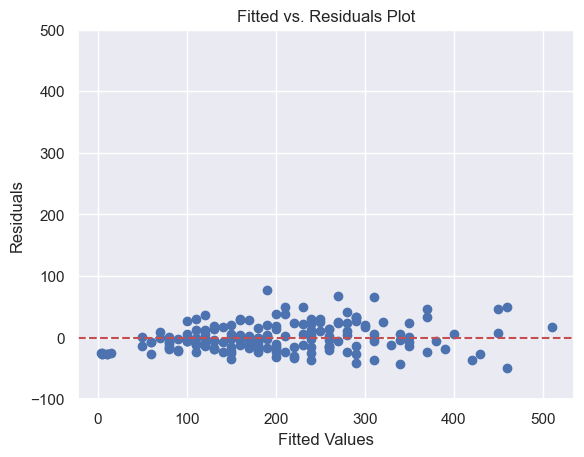

In [7]:
df_s_train_1['predict'] = model_1.predict(df_s_train_1)
df_s_train_1['residuals'] = df_s_train_1['Calories'] - df_s_train_1['predict']

plt.scatter(df_s_train_1['Calories'], df_s_train_1['residuals'])
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Fitted vs. Residuals Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.ylim(-100, 500)
plt.show()

As the Fitted vs. Residal Plot shown above, the points are arguably close to the line y = 0. Therefore, this data satisfies the assumption that there is a linear relationship between explantory variable and response variable. In additon, the plot shows a consistent spread of residuals across all levels of x without any clear pattern, so you can conclude that the assumption of equal variance is likely met.

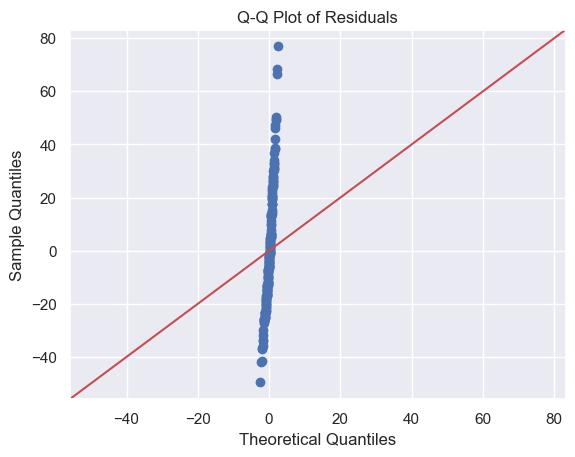

In [8]:
fig = sm.qqplot(df_s_train_1['residuals'], line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

If the points in the Q-Q plot closely follow this diagonal line, it suggests that the data are normally distributed. Deviations from the diagonal line indicate departures from normality. In this case, the plots do not exact follow this line, but it is tilted to the same way. Therefore, the assumption of normality of error is not fully met, but it partially does.

In [9]:
df_s_train_1.duplicated().sum()

0

As it is shown above, there is no duplicate entry for the training data. Therefore, I can say the observations are independent.

In [10]:
df_s_train_1[['Trans_Fat','Saturated_Fat','Total_Carbohydrates','Cholesterol']].corr()

,Trans_Fat,Saturated_Fat,Total_Carbohydrates,Cholesterol
Trans_Fat,1.000000,0.689064,0.565911,0.480698
Saturated_Fat,0.689064,1.000000,0.258162,0.186581
Total_Carbohydrates,0.565911,0.258162,1.000000,0.829098
Cholesterol,0.480698,0.186581,0.829098,1.000000


Especially between Total_Carbohydrates and Cholesterol, there is a high correlation. This is the problem called multicollinearity, and it inflates standard errors, leading to unreliable estimates of regression coefficients. It also makes it difficult to interpret the importance of individual predictors and can lead to unstable model estimates.

Based on these assumptions, I would say this model meet the assumptions for making a linear model, but it doesn't satisfied the assumptions for the inference for population by this model.

In [11]:
model_1.rsquared

0.950823628573438

Based on the code above, 95.08% of the data can be explained by this model. This is really high, and this means that the model is able to account for a large proportion of the variability in the data, which can be indicative of a strong relationship between the variables.

In [12]:
random_row = df_s_train_1.sample(n=1)
X = random_row.drop('Calories', axis=1)
predicted_value = model_1.predict(X)
actual_value = random_row['Calories'].values[0]
residual = actual_value - predicted_value
print(f"Predicted Value: {predicted_value.values[0]}")
print(f"Residual: {residual.values[0]}")

Predicted Value: 130.50492258919817
Residual: -10.504922589198173


In [13]:
y_pred = model_1.predict(df_s_train_1.drop('Calories', axis=1))
y_true = df_s_train_1['Calories']
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f"RMSE on training data: {rmse}")

RMSE on training data: 22.802274113007588


As shown above, there is a strong linear relationship between calories and Trans_Fat, Saturated_Fat, Total_Carbohydrates, and Cholesterol, after controlling the other variables. This is shown by the strong R squared value, and with satisfying the assumptions. However, this model doesn't fully meet the assumptions for the inference on population, so I might need to update this for the better prediction for the population. 

## 3. Logistic Regression Analytical Tasks

For our logistic model, we will predict whether a drink will be considered healthy

From our original dataset, we don't have any categorical or boolean variables that talk about the healthiness of a drink so we will need to create one. Our threshold will be whether or not a beverage is over 250 calories. If a drink is below 250 calories, we will consider that to be "healthy" and over 250 calories will be considered "unhealthy"

In [29]:
threshold = 250
df_s_train_1['Healthy'] = df_s['Calories'] <= threshold
df_s_train_1['Healthy'] = df_s_train_1['Healthy'].astype(int)
df_s_train_1

,Beverage_category,Beverage,Beverage_prep,Calories,Total_Fat,Trans_Fat,Saturated_Fat,Sodium,Total_Carbohydrates,Cholesterol,...,Protein,Vitamin_A_DV,Vitamin_C_DV,Calcium_DV,Iron_DV,Caffeine,frappuccino,predict,residuals,Healthy
108,Tazo® Tea Drinks,Tazo® Chai Tea Latte,Soymilk,110,1.5,0.2,0.0,0,45,20,...,3.0,4.0,0.0,10.0,6.0,50.0,0,110.380882,-0.380882,1
7,Classic Espresso Drinks,Caffè Latte,Tall Nonfat Milk,100,0.2,0.2,0.0,5,120,15,...,10.0,15.0,0.0,30.0,0.0,75.0,0,93.902371,6.097629,1
98,Signature Espresso Drinks,Caramel Apple Spice (Without Whipped Cream),Short,140,0.0,0.0,0.0,0,10,35,...,0.0,0.0,0.0,0.0,0.0,0.0,0,163.670859,-23.670859,1
191,Frappuccino® Blended Coffee,Mocha (Without Whipped Cream),Whole Milk,200,3.0,2.0,0.1,10,160,42,...,3.0,4.0,0.0,8.0,6.0,70.0,1,231.624833,-31.624833,1
118,Tazo® Tea Drinks,Tazo® Green Tea Latte,Short Nonfat Milk,130,0.2,0.1,0.0,5,85,26,...,7.0,10.0,4.0,20.0,2.0,25.0,0,133.411576,-3.411576,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),2% Milk,310,9.0,6.0,0.1,20,200,46,...,11.0,15.0,2.0,35.0,0.0,75.0,0,315.836081,-5.836081,0
183,Frappuccino® Blended Coffee,Coffee,Soymilk,160,1.5,0.2,0.0,0,150,35,...,2.0,4.0,0.0,10.0,0.0,70.0,1,172.349421,-12.349421,1
204,Frappuccino® Blended Coffee,Caramel (Without Whipped Cream),Soymilk,260,1.5,0.2,0.0,0,220,58,...,3.0,4.0,0.0,10.0,6.0,100.0,1,263.911776,-3.911776,0
50,Classic Espresso Drinks,Cappuccino,Grande Nonfat Milk,80,0.2,0.1,0.0,5,90,12,...,8.0,15.0,0.0,25.0,0.0,150.0,0,79.486090,0.513910,1


Now I want to see the log odds if a drink is healthy or unhealthy based on sugar, protein, total fat, total carbohydrates and caffeine. So lets fit a logistic model

In [34]:
health = smf.logit('Healthy ~ Sugars + Protein + Total_Fat + Caffeine + Total_Carbohydrates', data = df_s_train_1).fit()
health.summary()

Optimization terminated successfully.
         Current function value: 0.062116
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Healthy   No. Observations:                  174
Model:                          Logit   Df Residuals:                      168
Method:                           MLE   Df Model:                            5
Date:                Sun, 21 Apr 2024   Pseudo R-squ.:                  0.8990
Time:                        13:56:28   Log-Likelihood:                -10.808
converged:                       True   LL-Null:                       -106.96
Covariance Type:            nonrobust   LLR p-value:                 1.258e-39
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              50.0326     17.009      2.942      0.003      16.696      83.369
Sugars                 -0.8686      0.297     -2.923      0.003      -1.451      -0.286
Protein                -1.1745      0.409     -2.875      0.004      -1.975      -0.374
Total_Fat              -1.5140      0.586     -2.582      0.010      -2.663      -0.365
Caffeine                0.0140      0.012      1.183      0.237      -0.009       0.037
Total_Carbohydrates     0.0147      0.023      0.646      0.518      -0.030       0.059
=======================================================================================

Possibly complete quasi-separation: A fraction 0.74 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

As seen from above, the variables sugar, protein, and total fat lower the predicted log odds of a drink being healthy while Caffeine and total carbohydrates variables increase the predicted log odds of a drink being healthy.  

Our pseudo R squared value is 0.8990 which is high siggesting this is a good model for our data. 

In [56]:
from sklearn.metrics import roc_auc_score
df_s_test_1['Healthy'] = df_s_test_1['Calories'] <= threshold
df_s_test_1['Healthy'] = df_s_test_1['Healthy'].astype(int)
probabilities = health.predict(df_s_test_1)
true_labels = df_s_test_1['Healthy']
auc = roc_auc_score(true_labels, probabilities)
auc

1.0

Now we want to make a classifier to show what type of error we would like to avoid. First, we will make a confusion matrix.

In [51]:
from sklearn.metrics import confusion_matrix
prob = health.predict(df_s_train_1)
pred = (prob > 0.5).astype(int)
actual = df_s_train_1['Healthy']
cm = confusion_matrix(actual, pred)
cm

array([[ 50,   3],
       [  3, 118]])

We would want to minimize false positives. In the case of our model, we would want to reduce the amount of drinks that people think are healthy but are actually unhealthy so we would want to minimize that error. 

Now we should evaluate this and find the accuracy rate, sensitivity, and specificity.

In [49]:
Tn = 50
Fp = 3
Fn = 3
Tp = 118
Accuracy = (Tn + Tp) / (Tn + Fp + Fn + Tp)
Sen = Tp / (Tp +Fn)
Spe = Tn / (Tn + Fp)
print('Our Accuracy rate is', Accuracy)
print('Our sensitivity is', Sen)
print('Our specificity is', Spe)

Our Accuracy rate is 0.9655172413793104
Our sensitivity is 0.9752066115702479
Our specificity is 0.9433962264150944


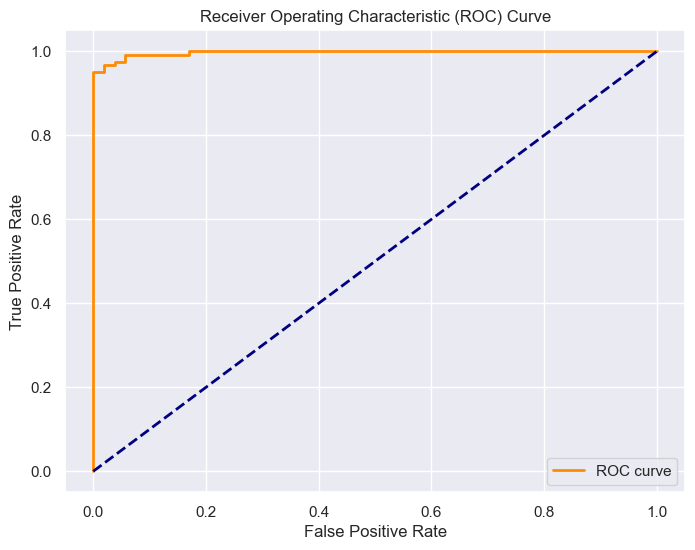

In [46]:
fpr, tpr, thresholds = roc_curve(actual, prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## 4. Conclusion

The confidence intervals in the models are a 95% confidence intervals. This interval provides a range within which we are 95% confident that the true population parameter lies. This confidence interval can give us or any analyst a good idea of  the population's true value. On each of our models, it shows the 95% confidence interval of each variable's value. 

Some limitations we faced from this dataset is that the dataset did not have any drinks that were seasonal and drinks that could have been recently added. Only avaliable year round drinks were included. This would mean that the models above would only be a good fit for this dataset only. Also, some drinks can be healthy for some and unhealthy for others. There could be some customers with health conditions that can make a healthy drink have bad reactions. As seen above from the earlier sections, there were some variables that had multicolinarity like Total carbohydrates and cholestrol. 

If me or someone else were to study more about this dataset, somethings they could consider doing could be finding the best linear regression model by either doing foward or backwards selection algorithms. With this, they can be able to find which variables have collinearity, which variables to drop, and finding the best model for this dataset. They could also add more variables to the logistic regression model and see each variable's coefficients to see which variables effect the healthiness of a drink.